<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Install Libraries</p>

In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Import Libraries</p>

In [8]:
# Data handling and analysis
import pandas as pd       # For working with data in DataFrame format
import numpy as np        # For numerical operations

# Data visualisation
import matplotlib.pyplot as plt  # For creating basic plots
import seaborn as sns            # For more advanced and beautiful plots

# ===============================
# Scikit-learn: Preprocessing, Model Selection & Evaluation
# ===============================

from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.metrics import (                         # For evaluating model performance
    accuracy_score, precision_score, recall_score, 
    f1_score, fbeta_score, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay
)

# Preprocessing
from sklearn.preprocessing import StandardScaler       # To scale numerical features
from sklearn.preprocessing import OneHotEncoder        # To encode categorical features
from sklearn.compose import ColumnTransformer          # To apply transformers to specific columns
from sklearn.pipeline import Pipeline                  # To create a pipeline of preprocessing and model

# ===============================
# Machine Learning Classifiers
# ===============================

from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.neural_network import MLPClassifier        # Multi-layer Perceptron (Neural Network)

# ===============================
# Handling Imbalanced Datasets
# ===============================

from imblearn.over_sampling import SMOTE                # SMOTE for oversampling minority class

# ===============================
# General Settings
# ===============================

from time import time  # To measure training time

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  

# Set plot style to 'ggplot'
plt.style.use('ggplot')

# Show plots directly in the Jupyter notebook
%matplotlib inline

<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Data Initialization</p>

In [9]:
# Load dataset
df = pd.read_csv('heart.csv')

# Preview data nicely
print("\n🔎 Preview of the Dataset:")
display(df)


🔎 Preview of the Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Data Understanding</p>

In [10]:
# Get the number of rows and columns in the DataFrame
rows, columns = df.shape

# Create a DataFrame to display the information
shape_df = pd.DataFrame({
    'Description': ['Number of Rows', 'Number of Columns'],
    'Count': [rows, columns]
})

# Display without index
display(shape_df.style.hide(axis='index'))  # For pandas 1.4+

Description,Count
Number of Rows,303
Number of Columns,14


In [11]:
# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Check if there are any missing values and display the result
if missing.any():
    print("⚠️ Missing values per column:\n", missing[missing > 0])
else:
    print("✅ No missing values found.\n")

# Show the data type of each column in the DataFrame
print("🔍 Column data types:\n")
display(df.dtypes.to_frame(name='Data Type'))  # Display as a DataFrame

✅ No missing values found.

🔍 Column data types:



,Data Type
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
# Get the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1


In [15]:
# Store the original number of rows before dropping duplicates
original_rows = df.shape[0]

# Drop duplicate rows from the DataFrame
df = df.drop_duplicates()

# Get the current number of rows and columns after removing duplicates
rows, columns = df.shape

# Calculate the number of duplicates removed
duplicates_removed = original_rows - rows

# Print the new shape, and the number of duplicates removed
print(f"✅ {duplicates_removed} duplicate rows removed. New shape: {df.shape}")

✅ 1 duplicate rows removed. New shape: (302, 14)


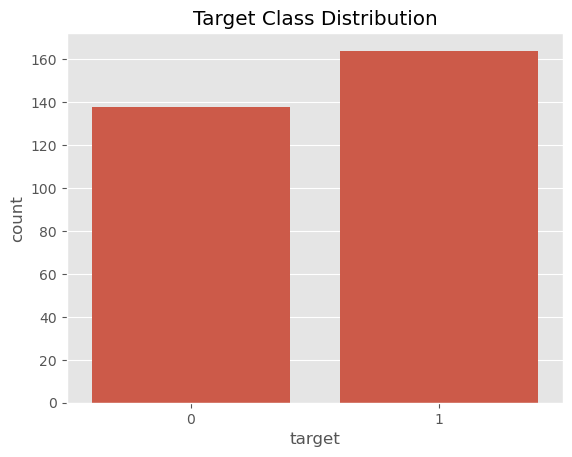

In [16]:
# Create a countplot to visualize the distribution of the target class
# 'x' specifies the target column to plot, 'data=df' indicates the dataset
sns.countplot(x='target', data=df)

# Set the title for the plot to indicate it's showing the target class distribution
plt.title("Target Class Distribution")

# Display the plot
plt.show()

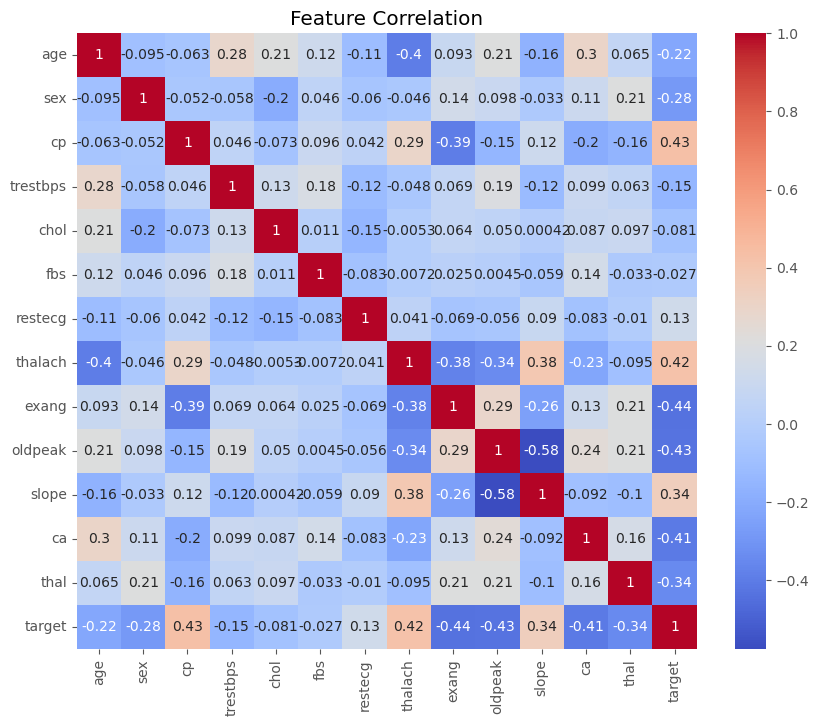

In [17]:
# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation between features
# df.corr() computes the correlation matrix, annot=True adds the correlation values to each cell
# cmap='coolwarm' defines the color scheme
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Set the title for the heatmap
plt.title("Feature Correlation")

# Display the heatmap
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Feature Selection & Data Splitting</p>

In [19]:
selected_features = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
]

In [20]:
X = df[selected_features]  # X will contain the selected features
y = df['target']  # y will contain the target variable, which is the heart disease diagnosis (1 = disease, 0 = no disease)

In [24]:
# Categorical columns represent discrete categories or labels (not continuous numbers)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Numerical columns represent continuous variables that have meaningful arithmetic relationships (e.g., age, cholesterol)
numerical_cols = list(set(X.columns) - set(categorical_cols))

# Convert categorical columns to 'category' dtype in pandas
# This helps optimize memory usage and makes it easier to apply categorical encoding later
X[categorical_cols] = X[categorical_cols].astype('category')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [26]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHot encoding for categorical columns
])

In [27]:
X_train_prep = preprocessor.fit_transform(X_train)  # Apply fit and transform on the training data
X_test_prep = preprocessor.transform(X_test)  # Apply transform only on the test data

In [28]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train)  # Apply SMOTE to the preprocessed training data

<a id="1"></a>
# <p style="padding:10px;background-color:#CADCFC;margin:0;color:#00246B;font-family:newtimeroman;font-size:150%;text-align:center;overflow:hidden;font-weight:500">Train and Evaluate Model Performance</p>

In [29]:
# Define the models you want to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Dictionary to store the trained models
trained_models = {}

# Iterate through each model and train it
for name, model in models.items():
    print(f"Training the {name} model...")  # Notify which model is being trained

    # Start measuring the time for model training
    start_time = time()

    # Fit the model on the resampled training data
    model.fit(X_train_res, y_train_res)

    # Calculate the training time
    training_time = time() - start_time

    # Store the trained model in the dictionary
    trained_models[name] = model

    # Print the completion message and training time
    print(f"{name} model trained in {training_time:.4f} seconds.\n")
    
# Final print message after all models are trained
print("All models have been trained successfully!")

Training the Random Forest model...
Random Forest model trained in 0.3391 seconds.

Training the SVM model...
SVM model trained in 0.0375 seconds.

Training the ANN model...
ANN model trained in 0.8499 seconds.

All models have been trained successfully!



=== Random Forest ===
Accuracy: 0.8197
Precision: 0.7895
Recall: 0.9091
F1 Score: 0.8451
F2 Score: 0.8824
ROC AUC: 0.9053

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



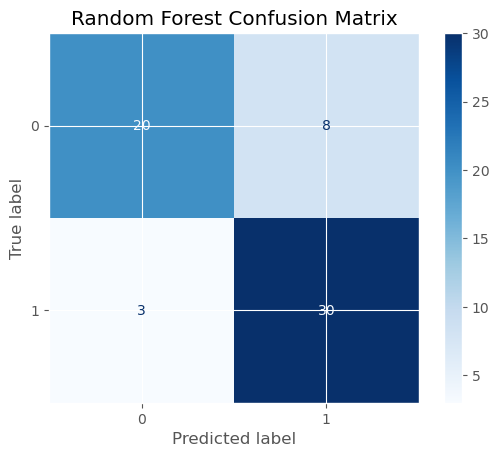

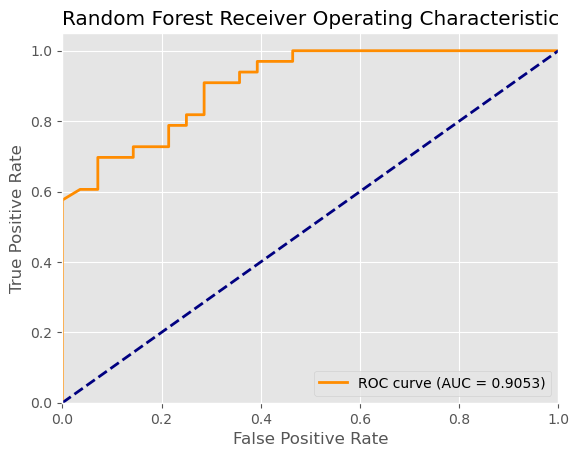


=== SVM ===
Accuracy: 0.8033
Precision: 0.7838
Recall: 0.8788
F1 Score: 0.8286
F2 Score: 0.8580
ROC AUC: 0.8939

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



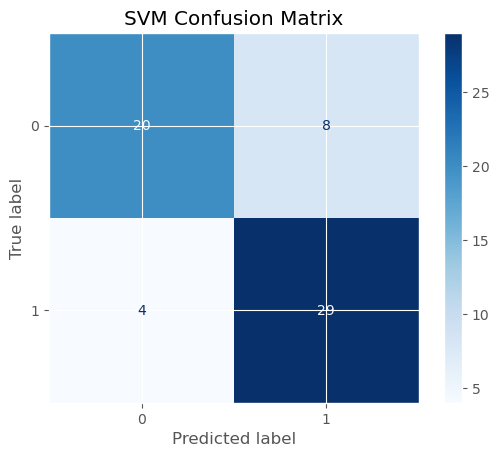

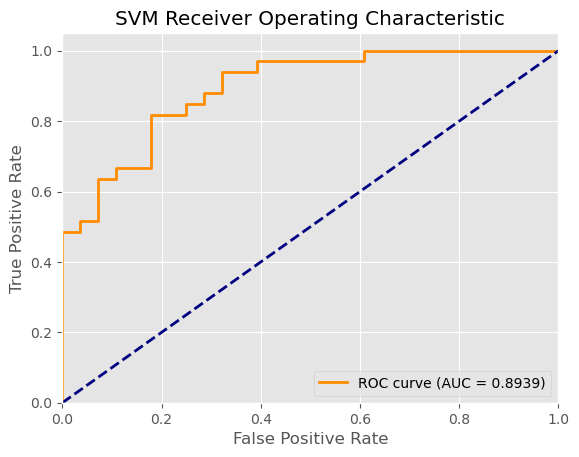


=== ANN ===
Accuracy: 0.7541
Precision: 0.7500
Recall: 0.8182
F1 Score: 0.7826
F2 Score: 0.8036
ROC AUC: 0.8203

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



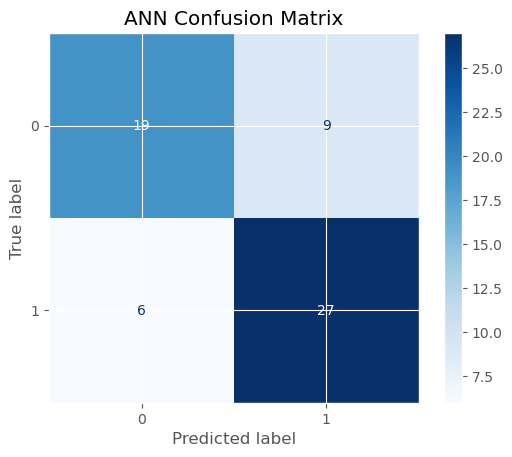

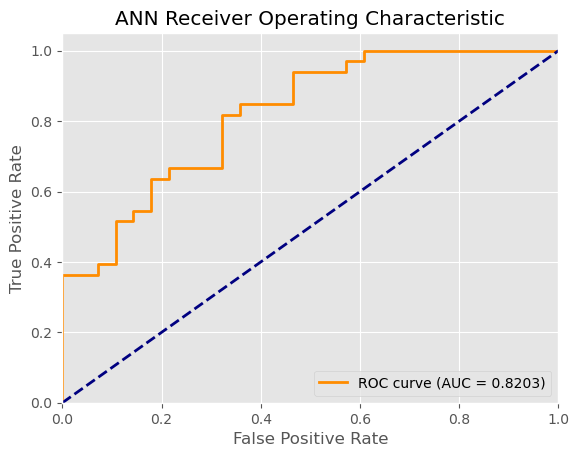

In [30]:
# List to store the evaluation results of each model
results = []

# Loop through each trained model in the dictionary
for name, model in trained_models.items():
    
    # Predict the class labels on the test set
    y_pred = model.predict(X_test_prep)
    
    # Predict the probabilities for positive class (used for ROC AUC)
    if hasattr(model, "predict_proba"):
        # Most models use predict_proba to get class probabilities
        y_proba = model.predict_proba(X_test_prep)[:, 1]
    else:
        # Some models (like SVM) use decision_function instead
        y_proba = model.decision_function(X_test_prep)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)                 # Accuracy
    prec = precision_score(y_test, y_pred)               # Precision
    rec = recall_score(y_test, y_pred)                   # Recall
    f1 = f1_score(y_test, y_pred)                        # F1 Score
    f2 = fbeta_score(y_test, y_pred, beta=2)             # F2 Score (recall-focused)
    roc_auc = roc_auc_score(y_test, y_proba)             # ROC AUC Score

    # Save results to list for comparison later
    results.append({
        'Model': name, 
        'Accuracy': round(acc, 4),  
        'Precision': round(prec, 4),  
        'Recall': round(rec, 4),  
        'F1 Score': round(f1, 4),
        'F2 Score': round(f2, 4),
        'ROC AUC': round(roc_auc, 4)
    })

    # Print all metrics for this model
    print(f"\n=== {name} ===")  
    print(f"Accuracy: {acc:.4f}") 
    print(f"Precision: {prec:.4f}")  
    print(f"Recall: {rec:.4f}")  
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Show detailed classification report (includes support, etc.)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred)) 

    # Show confusion matrix as a plot
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"{name} Confusion Matrix") 
    plt.show()

    # Plot ROC curve to visualize how well the model separates the classes.
    # The higher the curve and AUC score, the better the model is at distinguishing positives vs. negatives.
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # False Positive Rate & True Positive Rate
    roc_auc = auc(fpr, tpr)  # Area Under Curve
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [31]:
# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Optional: Sort by F1 Score or any metric you want
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Reset index for cleaner display
results_df.reset_index(drop=True, inplace=True)

# Display the comparison table
print("\n=== Model Comparison Table ===")
print(results_df.to_string(index=False))



=== Model Comparison Table ===
        Model  Accuracy  Precision  Recall  F1 Score  F2 Score  ROC AUC
Random Forest    0.8197     0.7895  0.9091    0.8451    0.8824   0.9053
          SVM    0.8033     0.7838  0.8788    0.8286    0.8580   0.8939
          ANN    0.7541     0.7500  0.8182    0.7826    0.8036   0.8203


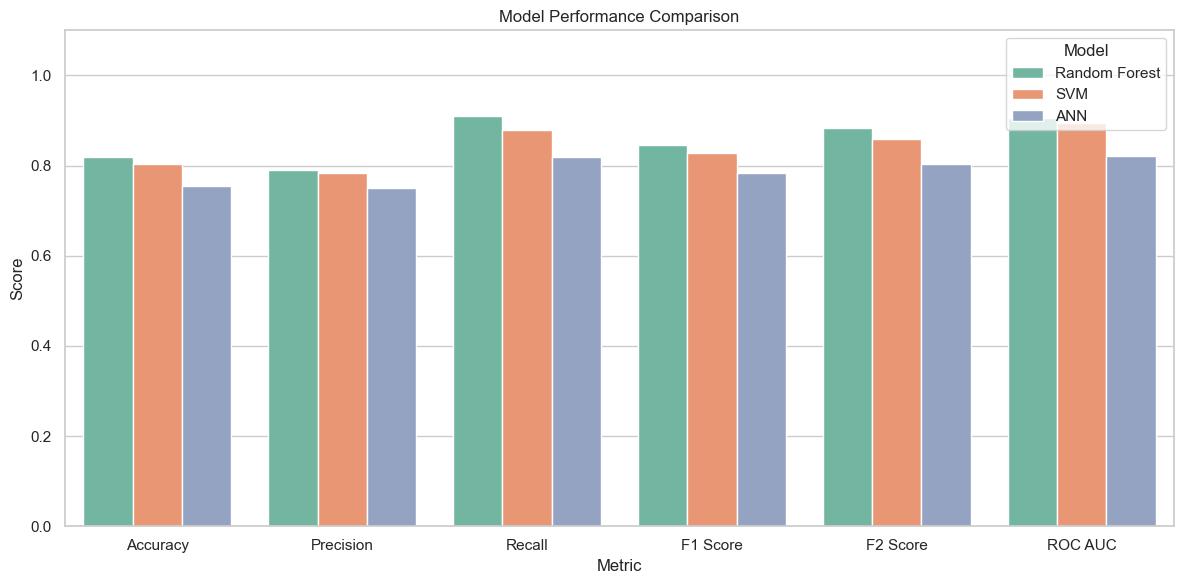

In [32]:
# Set the plot style
sns.set(style="whitegrid")

# Select which metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC']

# Set figure size
plt.figure(figsize=(12, 6))

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(results_df, id_vars='Model', value_vars=metrics_to_plot,
                    var_name='Metric', value_name='Score')

# Create grouped bar plot
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='Set2')

# Set labels and title
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.legend(title='Model', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

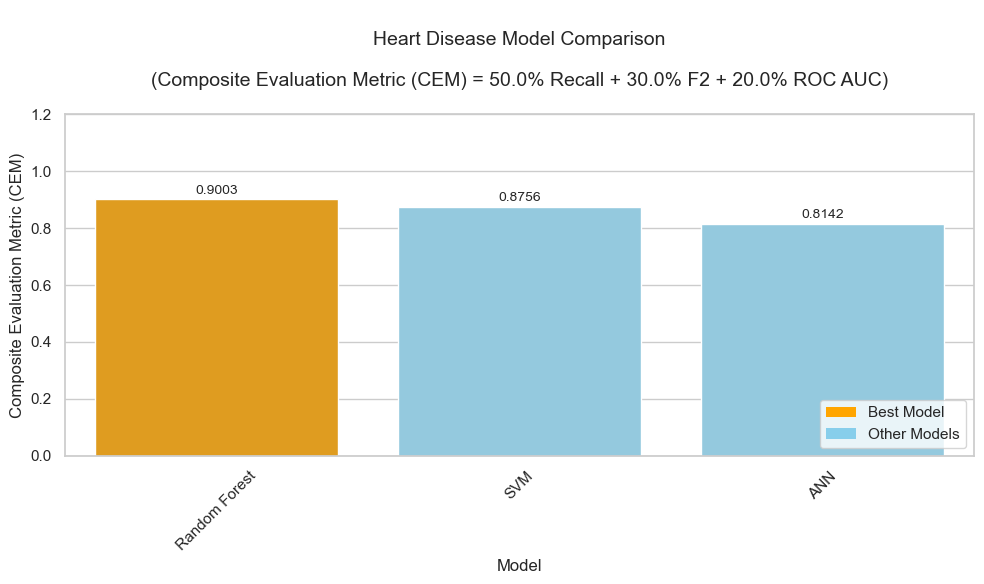

In [33]:
# Calculate composite score using weights
weights = {
    'Recall': 0.5,
    'F2 Score': 0.3, 
    'ROC AUC': 0.2
}

# Add CEM to DataFrame
results_df['CEM'] = (
    results_df['Recall'] * weights['Recall'] +
    results_df['F2 Score'] * weights['F2 Score'] +
    results_df['ROC AUC'] * weights['ROC AUC']
)

# Find the best model based on CEM
best_model_name = results_df.loc[results_df['CEM'].idxmax(), 'Model']
best_model = trained_models[best_model_name] 

# Create colors list highlighting the best model
colors = ['orange' if model == best_model_name else 'skyblue' for model in results_df['Model']]

# Plot using your original style
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='CEM',
    data=results_df,
    palette=colors
)

# Add title with weight explanation
plt.title(f"\nHeart Disease Model Comparison\n\n(Composite Evaluation Metric (CEM) = {weights['Recall']*100}% Recall + {weights['F2 Score']*100}% F2 + {weights['ROC AUC']*100}% ROC AUC)", 
         fontsize=14, pad=20)
plt.ylabel("Composite Evaluation Metric (CEM)")
plt.ylim(0, 1.2)

# Add value labels
for i, v in enumerate(results_df['CEM']):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

# Rotate the X-axis labels to make them readable
plt.xticks(rotation=45)

# Add legend explaining colors
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc='orange', edgecolor='none'), 
    plt.Rectangle((0,0),1,1,fc='skyblue', edgecolor='none')
], labels=['Best Model', 'Other Models'], loc='lower right')

plt.tight_layout()
plt.show()

In [34]:
import joblib

# Save the best model and preprocessor using joblib
joblib.dump(best_model, 'heart_model.pkl')  # Save the best model object
joblib.dump(preprocessor, 'preprocessor.pkl')  # Save the preprocessor (needed for future data transformations)

['preprocessor.pkl']